In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the dataset is loaded as 'df'
df = pd.read_csv('/content/creditcard.csv')

# Step 1: Data Preparation
X = df.drop(columns=['Class'])  # Features
y = df['Class']  # Target

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7, stratify=y)

In [5]:
# Step 2: Model Building
# 1. Logistic Regression
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_roc_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])

In [6]:
# 2. Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=7)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_roc_auc = roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:, 1])

In [7]:
# 3. XGBoost Classifier
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(random_state=7)
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_roc_auc = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])

                 Model  Accuracy  ROC AUC Score
0  Logistic Regression  0.999087       0.958472
1        Random Forest  0.999508       0.944342
2              XGBoost  0.999427       0.983139
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.85      0.57      0.69       148

    accuracy                           1.00     85443
   macro avg       0.92      0.79      0.84     85443
weighted avg       1.00      1.00      1.00     85443

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.95      0.76      0.84       148

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443

XGBoost Classification Report:
               precision    recall  f1-sc

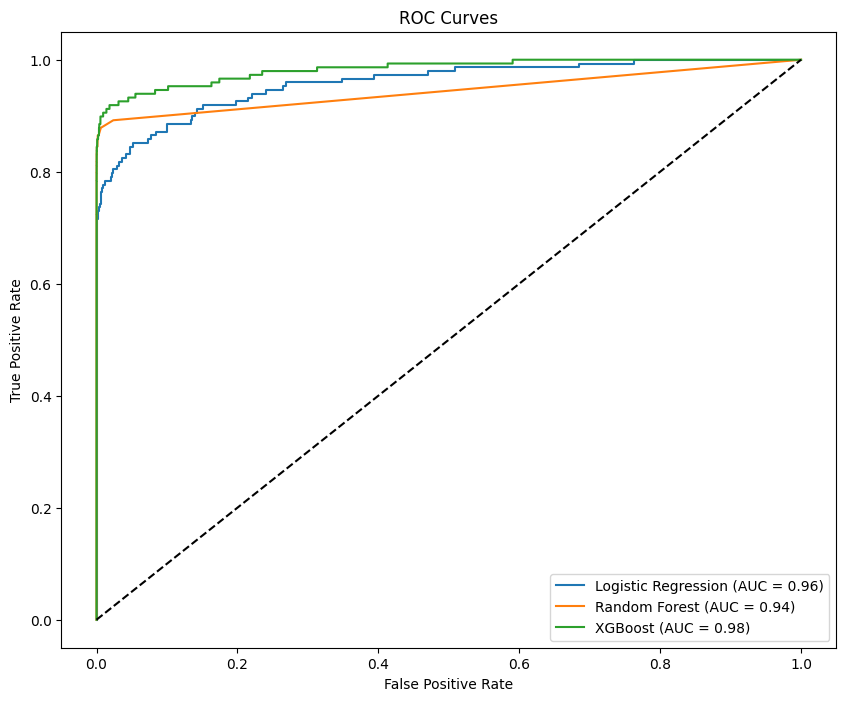

In [8]:
# Step 3: Model Comparison
model_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Accuracy': [lr_accuracy, rf_accuracy, xgb_accuracy],
    'ROC AUC Score': [lr_roc_auc, rf_roc_auc, xgb_roc_auc]
})

print(model_comparison)

# Detailed Evaluation (Optional)
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

# Optional: Plot ROC Curve for each model
from sklearn.metrics import roc_curve

def plot_roc_curve(model, X_test, y_test, label):
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc_score(y_test, y_pred_prob):.2f})')

plt.figure(figsize=(10, 8))
plot_roc_curve(log_reg, X_test, y_test, 'Logistic Regression')
plot_roc_curve(rf_clf, X_test, y_test, 'Random Forest')
plot_roc_curve(xgb_clf, X_test, y_test, 'XGBoost')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()